# **Programming exercises in Python:**

## **Computer Vision** usando OpenCV e delimitando o rosto a partir da foto de uma pessoa via url.

1. **Image Recognition**: Use a library like OpenCV or TensorFlow to create a program capable of recognizing objects or features in images.
1. **Reconhecimento de Imagens**: Use uma biblioteca como OpenCV ou TensorFlow para criar um programa que seja capaz de reconhecer objetos ou características em imagens.

In [1]:
# bibliotecas necessarias
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
    Essa funcao recebe uma url 
    Apos recerber a url, baixa a imagem dessa url e converte essa imagem em um array, 
    A partir do array e le a imagem no formato opencv (cv2) 
    Retorna uma imagem (matrix)
"""
def url_para_imagem(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    return image

In [37]:
img = url_para_imagem('https://uproxx.com/wp-content/uploads/2019/07/keanu-reeves-fan-youre-breathtaking-jpg.jpeg')

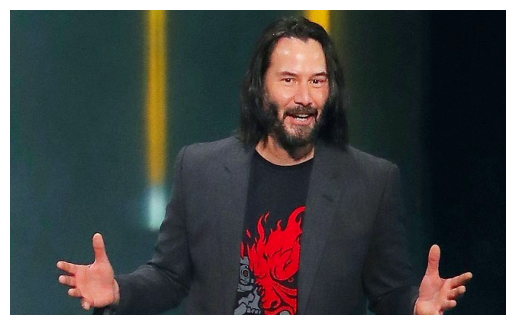

In [38]:
# utilizando matplotlib para exibir a imagem
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

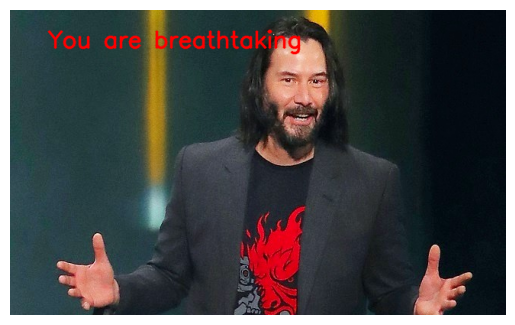

In [39]:
# Adicionando um texto na imagem
# Formatacao do texto
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (0, 0, 255) # vermelho em BGR
thickness = 2
   
# Usando cv2.putText() method para adicionar o texto na imagem
image = cv2.putText(img, 'You are breathtaking', org, font, fontScale, color, thickness, cv2.LINE_AA)

# utilizando matplotlib para exibir a imagem  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

The [Haar Cascade Classifier](https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d) is a machine learning object detection method used to identify objects or features within images. It's particularly well-suited for detecting objects that have a relatively simple and distinct visual pattern, such as faces. The classifier is based on the Haar-like features, which are simple rectangular filters that can be applied to an image to detect specific patterns of contrast.

In [4]:
# modelo treinado de deteccao facil frontal frontal
FACECLASSIFIER = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

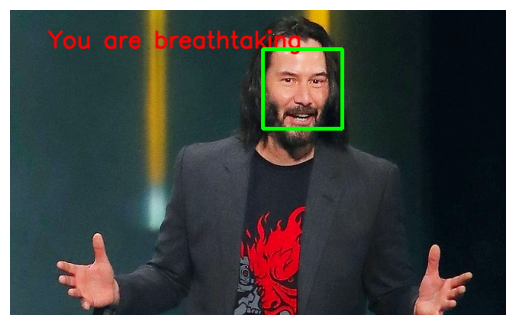

In [40]:
# Exibindo a imagem com o reconhecimento facial sendo delimitada por uma forma verde
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
detected_faces = FACECLASSIFIER.detectMultiScale(grayscale_image)
for (column, row, width, height) in detected_faces:
    cv2.rectangle(img,(column, row),(column + width, row + height),(0, 255, 0),4)    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## **Processamento de Linguagem Natural (PLN) ou Natural Language Processing (NLP)** em documento no formato de _Portable Document Format_ (PDF)

 Essa secao esta organizada da seguinte forma

1. **Leitura do arquivo capitulo 1 do livro 'Alice in Wonrdeland';**
2. **Extracao do texto para aplicacao de tecnicas de NLP;**
3. **Processamento textual;**
4. **Visualizacao das palavras mais frequentes na forma de wordcloud.**

In [82]:
import PyPDF2 as pdf
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [4]:
# Create an object of PdfReader class of PyPDF2 module and pass the pdf file object & get a pdf reader object
# This function receives a file name and returns the object of PdfReader
def read_pdf(filename):
    file = open(filename, 'rb')
    pdf_reader = pdf.PdfReader(file)

    return pdf_reader

In [23]:
# Extract text from each page of a pdf
# This function receives an object of PdfReader and returns a single string with the full text
def extract_text(pdf_reader, start_page, end_page):
    total_pages = len(pdf_reader.pages)
    text_content = ''
    i = 0

    for page_num in range(total_pages):
        page_content = pdf_reader.pages[page_num]
        
        # Check if the current page number is within the specified range
        if start_page <= page_num + 1 <= end_page:
            text_content += page_content.extract_text()
            i += 1

        if page_num + 1 == end_page:
            break

    return i, text_content

In [18]:
def extract_text(pdf_reader):
    total_pages = len(pdf_reader.pages)
    text_content = ''
    i = 0

    for page in range(total_pages):
        page_content = pdf_reader.pages[page]
        text_content += page_content.extract_text() # concate reading pages.
        i += 1

        if i == 48:
            return i, text_content 
        else:
            pass

    return i,text_content 

In [24]:
# path for the pdf file
filename = 'arquivos-diversos/alices-adventures-in-wonderland.pdf'

In [68]:
pdf_reader= read_pdf(filename)

In [26]:
total_pages = len(pdf_reader.pages)
total_pages

111

In [69]:
i,chapter_one = extract_text(pdf_reader, 4, 11)

In [30]:
i
# check if take only from the page 4 to 11 (Chapter 1)

8

In [156]:
# before text processing
chapter_one[:100]

'Alice’s Adventures in Wonderland 4Chapter I.  \nDown the Rabbit-Hole\nAlice was beginning to get very '

In [71]:
len(chapter_one)

11744

In [72]:
# Remove special characters
def remove_special(text):
    text = re.sub(r'\n', '', text) # remove newline characters (/n)
    text = re.sub('\d', ' ', text) # remove numbers 
    text = re.sub(r"[()\[\]!-;*?’‘]", ' ', text) # remove special charecters
    text = re.sub(' +', ' ', text)

    return text.lower()

In [73]:
text_one = remove_special(chapter_one)

In [155]:
# after text processing
text_one[:100] 

'alice s adventures in wonderland chapter i down the rabbit holealice was beginning to get very tired'

In [77]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text,language='english')
    filtered_tokens = [token for token in tokens if not token in stop_words]

    return filtered_tokens

In [78]:
text_without_sw = remove_stopwords(text_one)

In [81]:
len(text_without_sw)

1030

In [80]:
text_without_sw[:10]

['alice',
 'adventures',
 'wonderland',
 'chapter',
 'rabbit',
 'holealice',
 'beginning',
 'get',
 'tired',
 'sitting']

In [88]:
# Instantiate Lemmatizer 
lemmatizer = WordNetLemmatizer()

> Lemmatization is the process of grouping inflected forms together as a single base form.

- **For example, reducing "builds," "building," or "built" to the lemma "build"**

In [154]:
text_without_sw[:10]

['alice',
 'adventures',
 'wonderland',
 'chapter',
 'rabbit',
 'holealice',
 'beginning',
 'get',
 'tired',
 'sitting']

In [153]:
full_text = ''
for token in text_without_sw:
    lemma = lemmatizer.lemmatize(token)
    full_text += ' ' + str(lemma)

full_text [:100]   

' alice adventure wonderland chapter rabbit holealice beginning get tired sitting sister bank nothing'

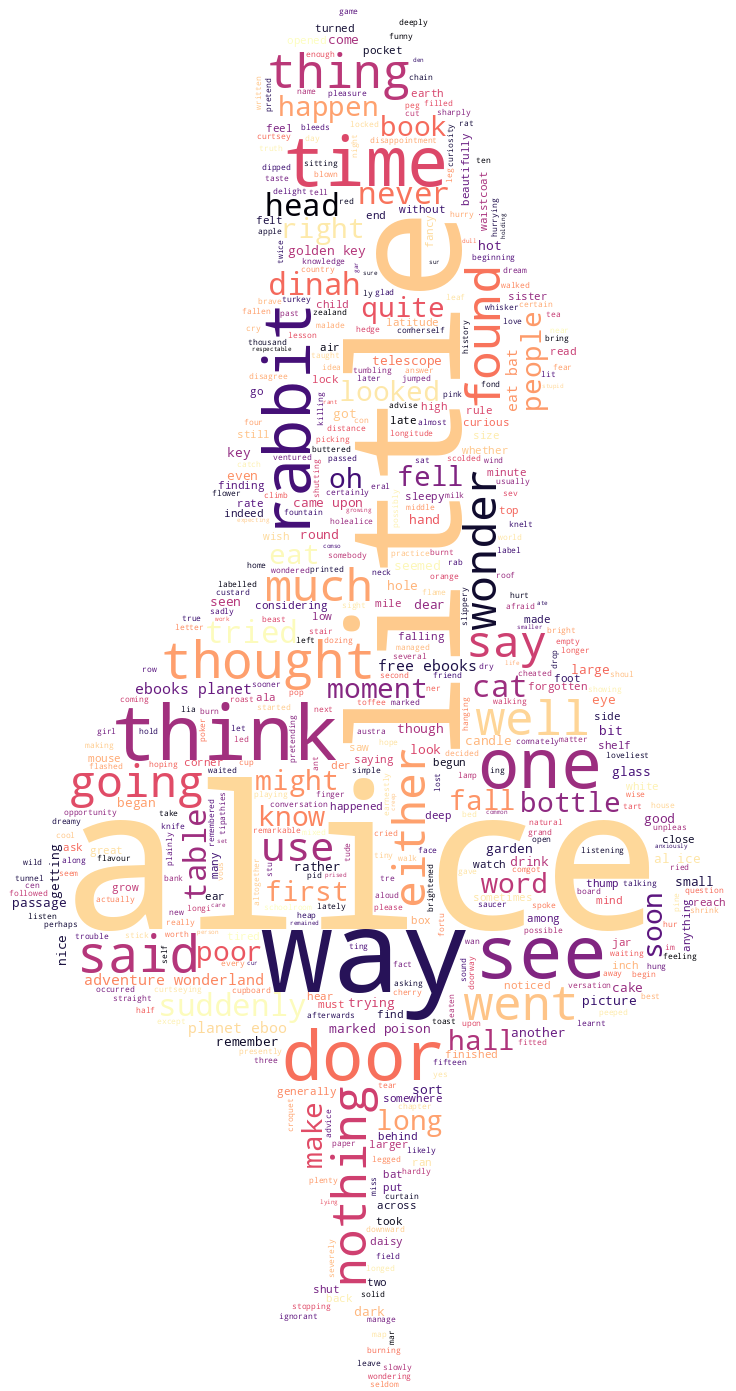

In [148]:
# Use an image to make the wordcloud
from PIL import Image
import numpy as np

image_path = 'arquivos-diversos/alice.jpg'
alice_mask = np.array(Image.open(image_path))

wc = WordCloud(scale = 1, width=1600, height=800, max_font_size=200, min_font_size=2, 
               colormap='magma', background_color="white", max_words=1000, mask=alice_mask)

# generate word cloud
wc.generate(full_text)

wc.to_image()